In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def classify(model, X, y):
    skf = StratifiedKFold()
    yp = cross_val_predict(model, X, y, cv=skf)
    acc = accuracy_score(y,yp)*100
    pre = precision_score(y, yp)*100
    rec = recall_score(y,yp)*100
    return (acc, pre, rec)

In [3]:
def run(model, df):
    results = []
    for filetype in np.unique(df['filetype']):
        cond1 = df['filetype'] == filetype
        X = df[cond1].drop(['class', 'filetype', 'algorithm'], axis=1)
        y = df[cond1]['class']
        acc, pre, rec = classify(model, X, y)
        results.append([filetype, acc, pre, rec])
    return results

In [4]:
def plot_results(results, model_name):
    results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
    results.plot.bar(x='filetype')
    plt.legend(loc='lower right')
    plt.ylabel('percentage (%)')
    plt.title('classification results (%s)' % model_name);

In [5]:
df = pd.read_csv('features.csv')
pd.set_option('mode.use_inf_as_na', True)
df.fillna(0, inplace=True)

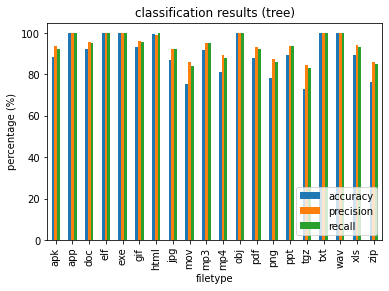

In [6]:
plot_results(run(Tree(), df), 'tree')

In [ ]:
plot_results(run(RandomForestClassifier(), df), 'random forest')

In [ ]:
plot_results(run(SVC(gamma='auto'), df), 'SVM')

In [ ]:
plot_results(run(GaussianNB(), df), 'Bayes')

In [ ]:
plot_results(run(KNeighborsClassifier(), df), 'KNN')

In [ ]:
# copy the data
norm = df.copy()
  
# apply normalization techniques
for column in ['kurtosis','entropy','stdev','chi','autocorr','mean']:
    norm[column] = norm[column]  / norm[column].abs().max()
    
plot_results(run(MLPClassifier(), norm), 'MLP')

In [ ]:
plot_results(run(QuadraticDiscriminantAnalysis(), df), 'QDA')

In [ ]:
X = df.drop(['class', 'algorithm', 'filetype'], axis=1)
y = df['class']
skf = StratifiedKFold()
yp = cross_val_predict(RandomForestClassifier(), X, y, cv=skf)
acc = accuracy_score(y,yp)*100
pre = precision_score(y, yp)*100
rec = recall_score(y,yp)*100
print(acc, pre, rec)

In [ ]:
results = []
for filetype in np.unique(df['filetype']):
    cond1 = df['filetype'] == filetype
    acc = accuracy_score(y[cond1],yp[cond1])*100
    pre = precision_score(y[cond1],yp[cond1])*100
    rec = recall_score(y[cond1],yp[cond1])*100
    print(filetype, acc, pre, rec)
    results.append([filetype, acc, pre, rec])
    
results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
results.plot.bar(x='filetype')
plt.legend(loc='lower right')
plt.ylabel('percentage (%)')
plt.title('classification results (overall)');